## LIBRARY


In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

### **1. Exploratory Data**

### Data Collection
Dataset is collected by ID/X Partners from a company


In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
path = '/content/drive/MyDrive/RAKAMIN ACADEMY BATCH 33/PBI- IDX PARTNERS/loan_data_2007_2014.csv'
pd.set_option('display.max_columns',None)
df = pd.read_csv(path)
df.sample(2)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
72378,72378,8384874,10127013,8000,8000,8000.0,36 months,6.97,246.91,A,A2,head mechanic,6 years,MORTGAGE,69600.0,Verified,Oct-13,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 10/21/13 > invest in oppor...,car,autoflip,540xx,WI,11.88,0.0,Mar-02,0.0,NaN,NaN,10.0,0.0,24786,46.0,18.0,f,2392.35,2392.35,6419.12,6419.12,5607.65,811.47,0.0,0.0,0.0,Jan-16,246.91,Jan-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,235793.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53900.0,NaN,NaN,NaN
136939,136939,5155965,6478226,1600,1600,1600.0,36 months,6.62,49.13,A,A2,PF Changs,9 years,RENT,30000.0,Not Verified,May-13,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 05/14/13 > I am paying off...,debt_consolidation,Small Debt Payoff,193xx,PA,2.44,0.0,Apr-79,0.0,NaN,NaN,9.0,0.0,2591,5.5,16.0,f,243.21,243.21,1520.96,1520.96,1356.79,164.17,0.0,0.0,0.0,Dec-15,49.13,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,2591.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47300.0,NaN,NaN,NaN


### Data Understanding


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

#### Missing Value

In [69]:
miss_value=df.isnull().sum().sort_values(ascending=False)[:41]
miss_value

inq_last_12m                   466285
total_bal_il                   466285
dti_joint                      466285
verification_status_joint      466285
annual_inc_joint               466285
open_acc_6m                    466285
open_il_6m                     466285
open_il_12m                    466285
open_il_24m                    466285
mths_since_rcnt_il             466285
il_util                        466285
open_rv_24m                    466285
total_cu_tl                    466285
inq_fi                         466285
max_bal_bc                     466285
all_util                       466285
open_rv_12m                    466285
mths_since_last_record         403647
mths_since_last_major_derog    367311
desc                           340302
mths_since_last_delinq         250351
next_pymnt_d                   227214
tot_cur_bal                     70276
tot_coll_amt                    70276
total_rev_hi_lim                70276
emp_title                       27588
emp_length  

In [70]:
total_rows = len(df)
miss_percent = (miss_value / total_rows) * 100
miss_percent = round(miss_percent, 2)[:41]
miss_percent

inq_last_12m                   100.00
total_bal_il                   100.00
dti_joint                      100.00
verification_status_joint      100.00
annual_inc_joint               100.00
open_acc_6m                    100.00
open_il_6m                     100.00
open_il_12m                    100.00
open_il_24m                    100.00
mths_since_rcnt_il             100.00
il_util                        100.00
open_rv_24m                    100.00
total_cu_tl                    100.00
inq_fi                         100.00
max_bal_bc                     100.00
all_util                       100.00
open_rv_12m                    100.00
mths_since_last_record          86.57
mths_since_last_major_derog     78.77
desc                            72.98
mths_since_last_delinq          53.69
next_pymnt_d                    48.73
tot_cur_bal                     15.07
tot_coll_amt                    15.07
total_rev_hi_lim                15.07
emp_title                        5.92
emp_length  



*   Memiliki 17 kolom yang berisi nilai nol dan bukan-null yang perlu dihapus.
* Nilai yang hilang > 50%:

mths_since_last_record = Jumlah bulan sejak pencatatan publik terakhir

mths_since_last_major_derog = Bulan sejak rating 90 hari terakhir atau lebih buruk

desc = Deskripsi pinjaman yang diberikan oleh peminjam

mths_since_last_delinq = Jumlah bulan sejak tunggakan terakhir peminjam


* Nilai yang hilang 40% - 50%:

next_Payment_d = Pembayaran bulan lalu telah diterima

* Nilai yang hilang 1% - 20%
tot_cur_bal = Total saldo semua akun saat ini
tot_coll_amt = Total jumlah penagihan yang terutang
total_rev_hi_lim = Total kredit/batas kredit tertinggi yang bergulir
emp_title = Jabatan yang diberikan oleh Peminjam saat mengajukan pinjaman.
emp_length = Lama bekerja dalam tahun. Nilai yang mungkin adalah antara 0 dan 10 dimana 0 berarti kurang dari satu tahun dan 10 berarti sepuluh tahun atau lebih.

* Nilai yang hilang di bawah 1%:

last_pymnt_d = Pembayaran bulan lalu telah diterima

revol_util = Tingkat pemanfaatan jalur bergulir, atau jumlah kredit yang digunakan peminjam relatif terhadap semua kredit bergulir yang tersedia

collections_12_mths_ex_med = Jumlah koleksi dalam 12 bulan tidak termasuk koleksi medis

last_credit_pull_d = Bulan terakhir LC menarik kredit untuk pinjaman ini

pub_rec = Jumlah catatan publik yang menghina
masuk_6 bulan terakhir delinq_2 tahun

open_acc = Jumlah jalur kredit terbuka dalam berkas kredit peminjam

early_cr_line = Bulan pembukaan batas kredit paling awal yang dilaporkan peminjam

acc_now_delinq = Jumlah rekening dimana peminjam kini menunggak

total_acc = Jumlah total batas kredit yang saat ini ada dalam berkas kredit peminjam

titleobject




### Handling Missing Value

In [71]:
df_miss=df.copy()

In [72]:
#Drop feature if missing value >50%
# threshold persentase missing value (50%)
threshold = 50

columns_to_drop = miss_percent[miss_percent> threshold].index
df_miss_1 = df_miss.drop(columns=columns_to_drop)

In [73]:
df_miss_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 54 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  466285 non-null  int64  
 1   id                          466285 non-null  int64  
 2   member_id                   466285 non-null  int64  
 3   loan_amnt                   466285 non-null  int64  
 4   funded_amnt                 466285 non-null  int64  
 5   funded_amnt_inv             466285 non-null  float64
 6   term                        466285 non-null  object 
 7   int_rate                    466285 non-null  float64
 8   installment                 466285 non-null  float64
 9   grade                       466285 non-null  object 
 10  sub_grade                   466285 non-null  object 
 11  emp_title                   438697 non-null  object 
 12  emp_length                  445277 non-null  object 
 13  home_ownership

In [74]:
miss_value=df_miss_1.isnull().sum().sort_values(ascending=False)[:20]
miss_value

next_pymnt_d                  227214
total_rev_hi_lim               70276
tot_cur_bal                    70276
tot_coll_amt                   70276
emp_title                      27588
emp_length                     21008
last_pymnt_d                     376
revol_util                       340
collections_12_mths_ex_med       145
last_credit_pull_d                42
delinq_2yrs                       29
acc_now_delinq                    29
total_acc                         29
pub_rec                           29
open_acc                          29
earliest_cr_line                  29
inq_last_6mths                    29
title                             20
annual_inc                         4
loan_status                        0
dtype: int64

Mengisi missing value menggunakan nilai mediannya untuk fitur numerik dan mode untuk fitur kategorikal.

In [75]:
# Numerical columns
for col in df_miss_1.select_dtypes(exclude='object'):
    df_miss_1[col] = df_miss_1[col].fillna(df_miss_1[col].median())
df_miss_1.isnull().sum()

Unnamed: 0                         0
id                                 0
member_id                          0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_title                      27588
emp_length                     21008
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
loan_status                        0
pymnt_plan                         0
url                                0
purpose                            0
title                             20
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                        0
earliest_cr_line                  29
i

In [76]:
# categorical columns
for col in df_miss_1.select_dtypes(include='object'):
    df_miss_1[col] = df_miss_1[col].fillna(df_miss_1[col].mode().iloc[0])
print("Updated Missing Values")
df_miss_1.isnull().sum()

Updated Missing Values


Unnamed: 0                    0
id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_ut

### Checking Unique Value


In [77]:
print("Unique Features (Numerical)")
print(df_miss_1.select_dtypes(exclude='object').nunique())

Unique Features (Numerical)
Unnamed: 0                    466285
id                            466285
member_id                     466285
loan_amnt                       1352
funded_amnt                     1354
funded_amnt_inv                 9854
int_rate                         506
installment                    55622
annual_inc                     31901
dti                             3997
delinq_2yrs                       24
inq_last_6mths                    28
open_acc                          62
pub_rec                           26
revol_bal                      58142
revol_util                      1269
total_acc                        112
out_prncp                     135665
out_prncp_inv                 141189
total_pymnt                   351609
total_pymnt_inv               347659
total_rec_prncp               172713
total_rec_int                 270249
total_rec_late_fee              5808
recoveries                     22773
collection_recovery_fee        20275
last_pymnt

Tanpa nama: 0, id, dan member_id bersifat unik untuk setiap baris

policy_code hanya memiliki satu nilai unik

In [78]:
print("Unique Features (Categorical)")
print(df_miss_1.select_dtypes(exclude=['int','float']).nunique())

Unique Features (Categorical)
term                        2
grade                       7
sub_grade                  35
emp_title              205475
emp_length                 11
home_ownership              6
verification_status         3
issue_d                    91
loan_status                 9
pymnt_plan                  2
url                    466285
purpose                    14
title                   63099
zip_code                  888
addr_state                 50
earliest_cr_line          664
initial_list_status         2
last_pymnt_d               98
next_pymnt_d              100
last_credit_pull_d        103
application_type            1
dtype: int64


emp_title, url,title, zip_code, early_cr_line memiliki lebih dari 500 nilai unik

last_credit_pull_d,last_pymnt_d,issue_d,addr_state memiliki setidaknya 50 nilai unik (di bawah 500)

application_type hanya memiliki satu nilai unik

Feature yang memiliki nilai uniqe banyak, perlu di drop


In [79]:
df_miss_1["term"].unique()

array([' 36 months', ' 60 months'], dtype=object)

perlu membersihkan spasi

In [80]:
def word_strip(x):
  return x.strip()

df_miss_1['term'] = df_miss_1['term'].apply(lambda x: word_strip(x))
df_miss_1["term"].unique()

array(['36 months', '60 months'], dtype=object)

In [81]:
df_miss_1["grade"].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [82]:
df_miss_1["sub_grade"].unique()

array(['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5'], dtype=object)

In [83]:
df_miss_1["emp_length"].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years'],
      dtype=object)

In [84]:
df_miss_1["home_ownership"].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [85]:
df_miss_1["verification_status"].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [86]:
df_miss_1["purpose"].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

### Duplicated Data

In [87]:
df.duplicated().sum()

0

Tidak ada data duplikat dalam dataset

### **2. Defining Label**
loan_status akan menjadi target variabel.

Namun, saya tidak bisa mengimplementasikannya secara langsung pada 9 nilai unik
sehingga perlu mengelompokkannya ke dalam kelompok untuk klasifikasi biner


In [88]:
df_miss_1["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

Good Loan (1) : Fully Paid, Does not meet the credit policy. Status:Fully Paid, In Grade Period, Late (16-30 days)


Bad Loan (0) : Charged Off, Does not meet the credit policy. Status:Charged
Off, Default, Late (31-120 days)

Good Loan (1) and the Bad Loan (0) untuk klasifikasi biner.


In [89]:
# Tentukan kamus untuk mengkodekan target variabel
target_dict = {'Fully Paid':1,
               'Does not meet the credit policy. Status:Fully Paid':1,
               'Charged Off':0,
               'Does not meet the credit policy. Status:Charged Off':0,
               'Default':0,
               'Late (31-120 days)':0,
               'Current':1,
               'In Grace Period':1,
               'Late (16-30 days)':1}
# Create the mapped values in a new column
df_miss_1['loan_status'] = df_miss_1['loan_status'].map(target_dict)

In [90]:
pd.set_option('display.max_columns',None)
df_miss_1.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,Teacher,10+ years,RENT,24000.0,Verified,Dec-11,1,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Feb-16,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,0,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Feb-16,Sep-13,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,Teacher,10+ years,RENT,12252.0,Not Verified,Dec-11,1,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Feb-16,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,1,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Feb-16,Jan-15,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,1,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0


### **3. Feature Engineering**



Datetime setting

In [91]:
# The month the borrower's earliest reported credit line was opened
df_miss_1['earliest_cr_line'].value_counts()

Oct-00    3703
Aug-00    3597
Aug-01    3455
Oct-99    3406
Oct-01    3329
          ... 
Jul-55       1
Feb-57       1
Oct-54       1
May-53       1
Nov-56       1
Name: earliest_cr_line, Length: 664, dtype: int64

In [92]:
df_miss_1['earliest_cr_line'] = pd.to_datetime(df_miss_1['earliest_cr_line'], format='%b-%y')

In [93]:
# The most recent month LC pulled credit for this loan
df_miss_1['last_credit_pull_d'].value_counts()

Jan-16    327741
Dec-15     13992
Nov-15      8384
Sep-15      8051
Oct-15      7957
           ...  
Nov-07         3
May-08         1
Jun-08         1
Jul-08         1
Jul-07         1
Name: last_credit_pull_d, Length: 103, dtype: int64

In [94]:
# Last month payment was received
df_miss_1['last_pymnt_d'].value_counts()

Jan-16    179996
Dec-15     62000
Jul-15     11703
Oct-15     11248
Sep-15     10204
           ...  
Jun-08        20
Mar-08        18
Jan-08        11
Feb-08         8
Dec-07         2
Name: last_pymnt_d, Length: 98, dtype: int64

In [95]:
# The month which the loan was funded
df_miss_1['issue_d'].value_counts()

Oct-14    38782
Jul-14    29306
Nov-14    25054
May-14    19099
Apr-14    19071
          ...  
Aug-07       74
Jul-07       63
Sep-08       57
Sep-07       53
Jun-07       24
Name: issue_d, Length: 91, dtype: int64

In [96]:
df_miss_1[['issue_d','last_pymnt_d','last_credit_pull_d']].head(3)

,issue_d,last_pymnt_d,last_credit_pull_d
0,Dec-11,Jan-15,Jan-16
1,Dec-11,Apr-13,Sep-13
2,Dec-11,Jun-14,Jan-16


In [97]:
def date_time(dt):
  if dt.year > 2016:
    dt = dt.replace(year=dt.year-100)
  return dt

In [98]:
# Set standard datetime
df_miss_1['earliest_cr_line'] = pd.to_datetime(df_miss_1['earliest_cr_line'], format='%b-%y')  # Bulan ketika credit line awal peminjam dilaporkan dibuka
df_miss_1['earliest_cr_line'] = df_miss_1['earliest_cr_line'].apply(lambda x: date_time(x))
df_miss_1['issue_d'] = pd.to_datetime(df_miss_1['issue_d'], format='%b-%y')  # Bulan ketika pinjaman didanai
df_miss_1['last_pymnt_d'] = pd.to_datetime(df_miss_1['last_pymnt_d'], format='%b-%y')  # Bulan terakhir pembayaran diterima
df_miss_1['last_credit_pull_d'] = pd.to_datetime(df_miss_1['last_credit_pull_d'], format='%b-%y')  # Bulan paling baru LC menarik kredit untuk pinjaman ini
df_miss_1[['earliest_cr_line', 'issue_d', 'last_pymnt_d', 'last_credit_pull_d']].head(3)

,earliest_cr_line,issue_d,last_pymnt_d,last_credit_pull_d
0,1985-01-01,2011-12-01,2015-01-01,2016-01-01
1,1999-04-01,2011-12-01,2013-04-01,2013-09-01
2,2001-11-01,2011-12-01,2014-06-01,2016-01-01


In [99]:
df_miss_1.head(5)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,Teacher,10+ years,RENT,24000.0,Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,1985-01-01,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,2015-01-01,171.62,Feb-16,2016-01-01,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,0,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,1999-04-01,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,Feb-16,2013-09-01,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,Teacher,10+ years,RENT,12252.0,Not Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,2001-11-01,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,2014-06-01,649.91,Feb-16,2016-01-01,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,1996-02-01,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,2015-01-01,357.48,Feb-16,2015-01-01,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,17.94,0.0,1996-01-01,0.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,2016-01-01,67.79,Feb-16,2016-01-01,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0


In [100]:
df_miss_1.to_csv('df_final.csv', index=False)
!cp 'df_final.csv' '/content/drive/MyDrive/RAKAMIN ACADEMY BATCH 33/PBI- IDX PARTNERS'
print('Saving cleaned data is done!')

Saving cleaned data is done!


In [101]:
df_final = pd.read_csv('/content/drive/MyDrive/RAKAMIN ACADEMY BATCH 33/PBI- IDX PARTNERS/df_final.csv')

In [102]:
df_final.head(5)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,Teacher,10+ years,RENT,24000.0,Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,1985-01-01,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,2015-01-01,171.62,Feb-16,2016-01-01,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,0,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,1999-04-01,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,Feb-16,2013-09-01,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,Teacher,10+ years,RENT,12252.0,Not Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,2001-11-01,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,2014-06-01,649.91,Feb-16,2016-01-01,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,1996-02-01,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,2015-01-01,357.48,Feb-16,2015-01-01,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,17.94,0.0,1996-01-01,0.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,2016-01-01,67.79,Feb-16,2016-01-01,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0


In [103]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 54 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  466285 non-null  int64  
 1   id                          466285 non-null  int64  
 2   member_id                   466285 non-null  int64  
 3   loan_amnt                   466285 non-null  int64  
 4   funded_amnt                 466285 non-null  int64  
 5   funded_amnt_inv             466285 non-null  float64
 6   term                        466285 non-null  object 
 7   int_rate                    466285 non-null  float64
 8   installment                 466285 non-null  float64
 9   grade                       466285 non-null  object 
 10  sub_grade                   466285 non-null  object 
 11  emp_title                   466285 non-null  object 
 12  emp_length                  466285 non-null  object 
 13  home_ownership

### **4. Exploratory Data Analysis**



#### Analysing Descriptive Statistics

In [104]:
df_final.head(5)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,Teacher,10+ years,RENT,24000.0,Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,1985-01-01,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,2015-01-01,171.62,Feb-16,2016-01-01,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,0,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,1999-04-01,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,Feb-16,2013-09-01,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,Teacher,10+ years,RENT,12252.0,Not Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,2001-11-01,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,2014-06-01,649.91,Feb-16,2016-01-01,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,1996-02-01,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,2015-01-01,357.48,Feb-16,2015-01-01,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,17.94,0.0,1996-01-01,0.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,2016-01-01,67.79,Feb-16,2016-01-01,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0


##### Feature Numerical

In [105]:
df_final.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.0,466285.000000,4.662850e+05,4.662850e+05,4.662850e+05
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327729e+04,0.890693,17.218758,0.284661,0.804695,11.186995,0.160554,1.623020e+04,56.177985,25.064302,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009082,1.0,0.004002,1.629893e+02,1.301714e+05,2.923681e+04
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496334e+04,0.312024,7.851121,0.797343,1.091583,4.987380,0.510848,2.067625e+04,23.724005,11.599792,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108632,0.0,0.068635,1.348289e+04,1.416729e+05,3.443264e+04
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,1.000000,11.360000,0.000000,0.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,1.0,0.000000,0.000000e+00,3.361100e+04,1.500000e+04
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,1.000000,16.870000,0.000000,0.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,1.0,0.000000,0.000000e+00,8.153900e+04,2.280000e+04
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.895300e+04,1.000000,22.780000,0.000000,1.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,1.0,0.000000,0.000000e+00,1.849300e+05,3.430000e+04
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,1.000000,39.990000,29.000000,33.000000,84.000000,63.000000,2.568995e+06,892.300000,156.000000,32160.380000,32160.380000,57777.579870,57777.580000,35000.030000,24205.620000,358.680000,33520.270000,7002.190000,36234.440000,20.000000,1.0,5.000000,9.152545e+06,8.000078e+06,9.999999e+06


##### Feature Categorical

In [106]:
df_final.describe(exclude=['int','float'])

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,url,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
count,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285
unique,2,7,35,205475,11,6,3,91,2,466285,14,63099,888,50,664,2,98,100,103,1
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,2014-10-01,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Debt consolidation,945xx,CA,2000-10-01,f,2016-01-01,Feb-16,2016-01-01,INDIVIDUAL
freq,337953,136929,31686,32987,171057,235875,168055,38782,466276,1,274195,164095,5304,71450,3703,303005,179996,435607,327741,466285


#### Target Counts

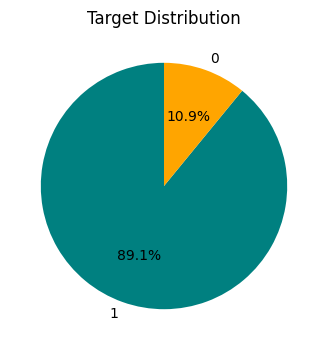

Target Counts:
1    415317
0     50968
Name: loan_status, dtype: int64


In [107]:
colors = ['teal', 'orange']
plt.figure(figsize=(4, 4))
df_final['loan_status'].value_counts().plot.pie(autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Target Distribution")
plt.ylabel("")
plt.show()

target_counts = df_final['loan_status'].value_counts()
print("Target Counts:")
print(target_counts)

Terlihat bahwa distribusi antara nilai target 0 dan 1 tidak seimbang. Jumlah entri dengan nilai target 1 jauh lebih banyak daripada nilai target 0. Hal ini menunjukkan ketidakseimbangan kelas dalam dataset.

### Univariate Analysis Categorical Feature

In [108]:
# Variabel Kategorikal (cats)
cats = ['term',
        'grade',
        'home_ownership',
        'pymnt_plan',
        'verification_status',
        'initial_list_status',
        'emp_length']

###  Visualisasi barplot presentase fitur kategorik terhadap target

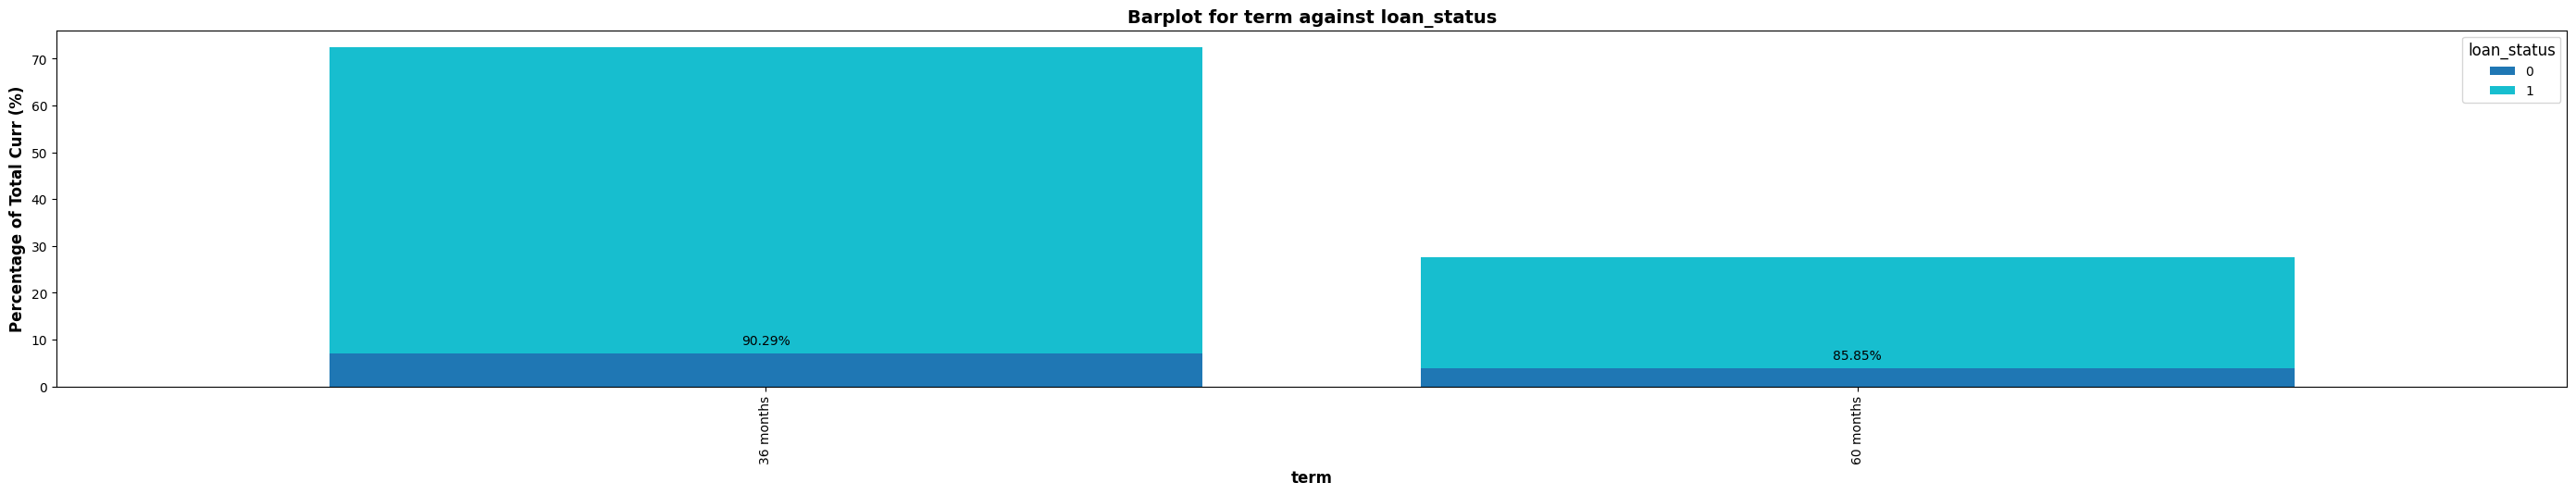

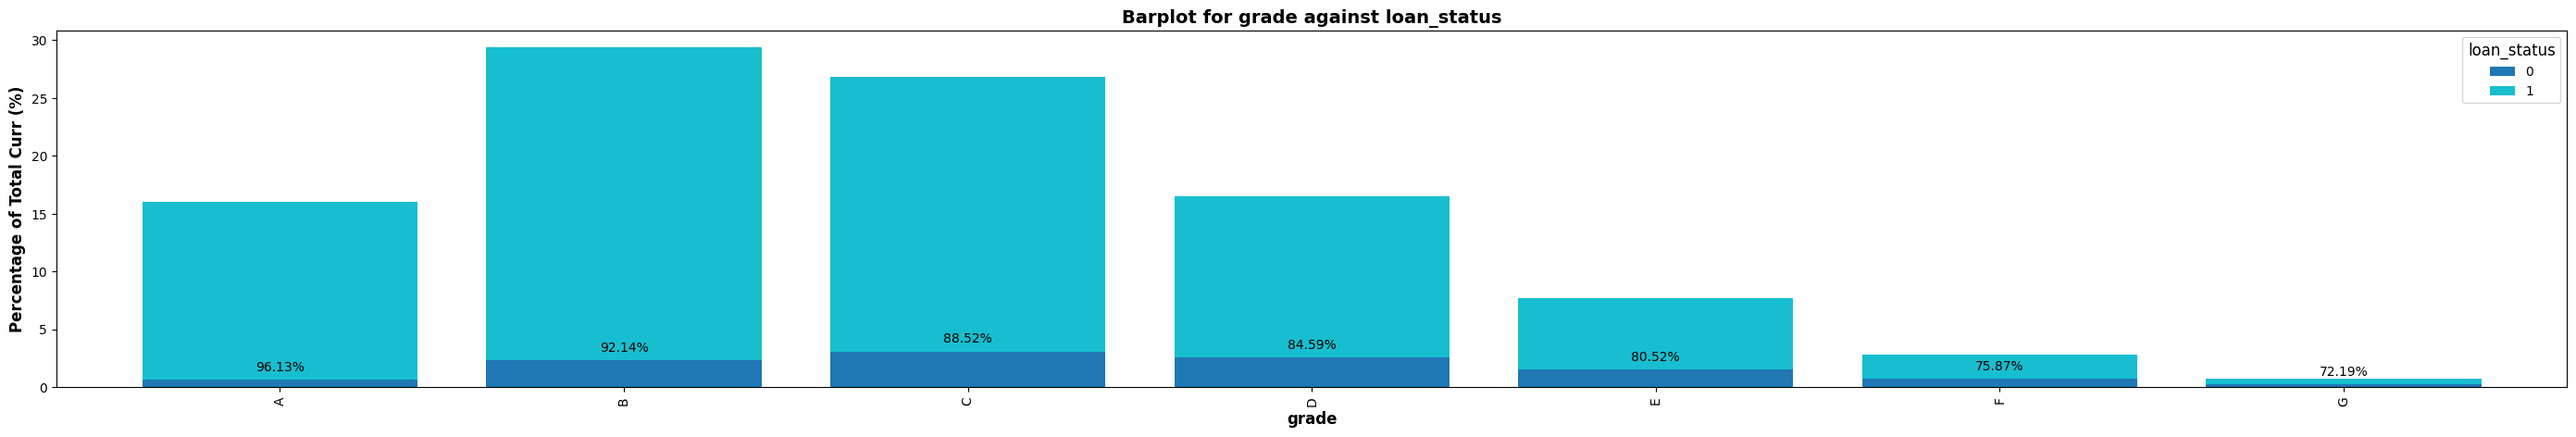

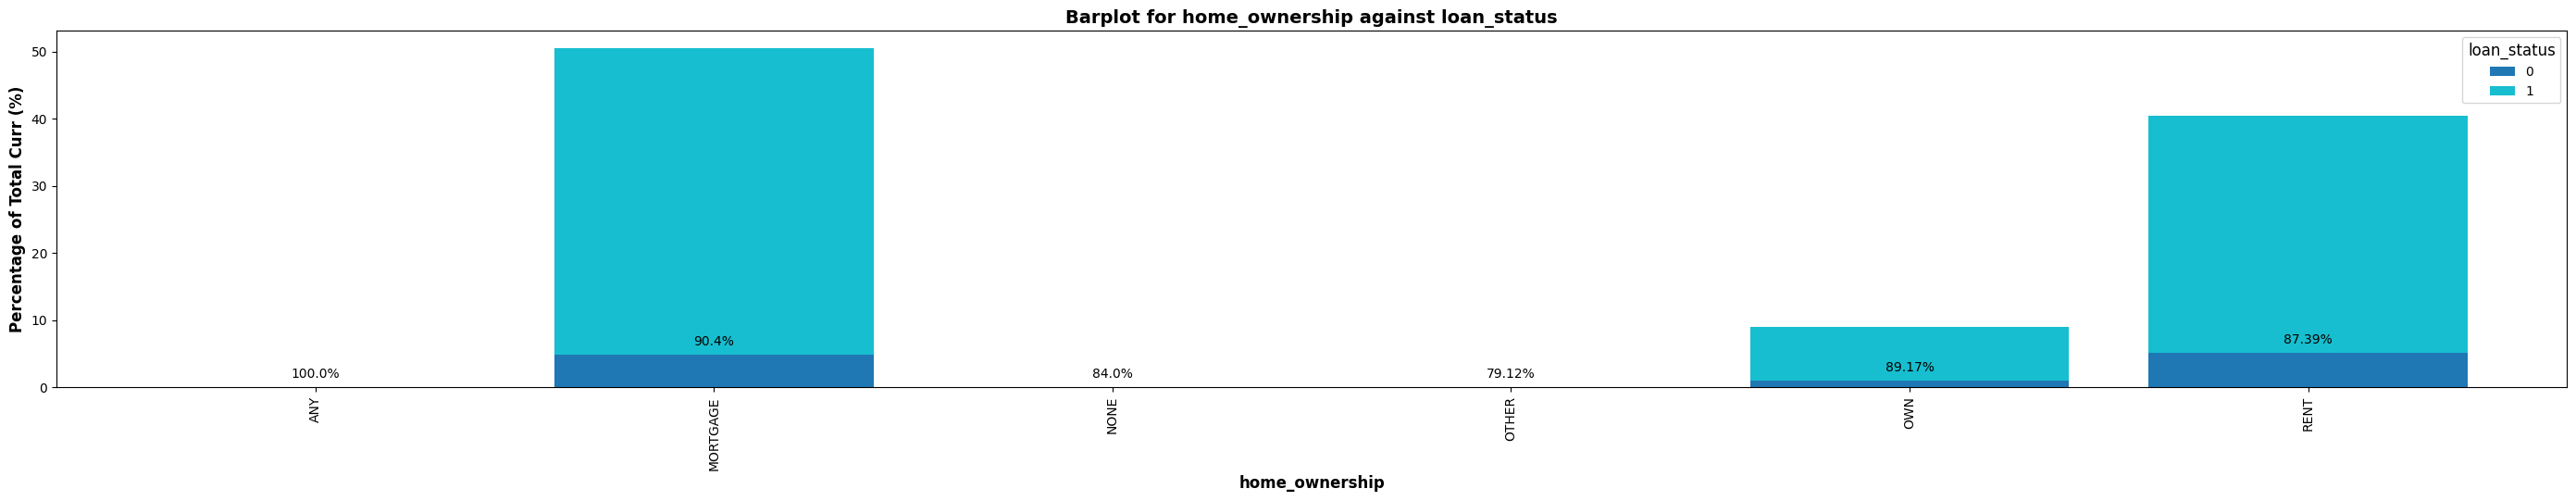

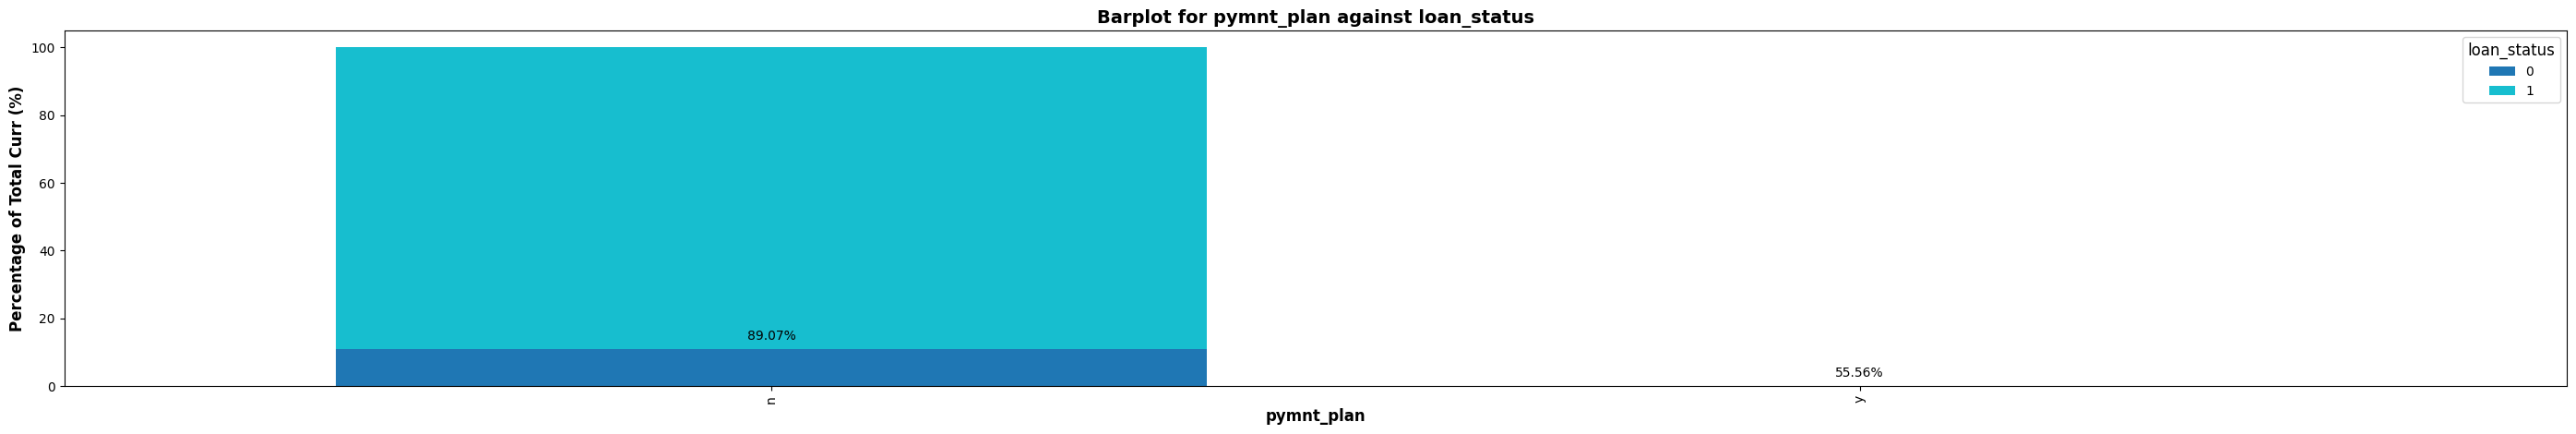

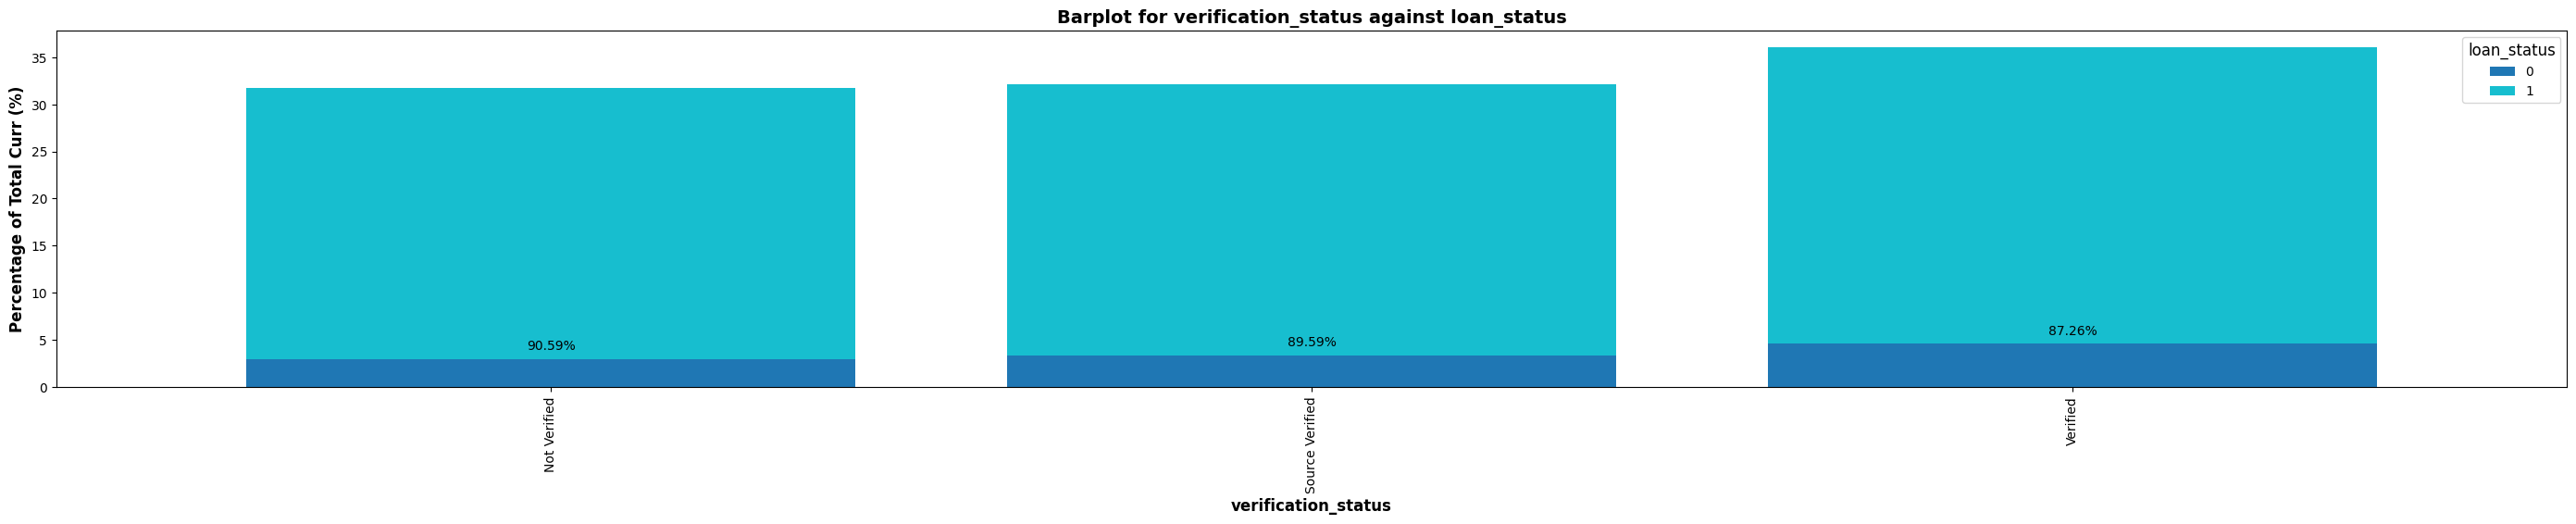

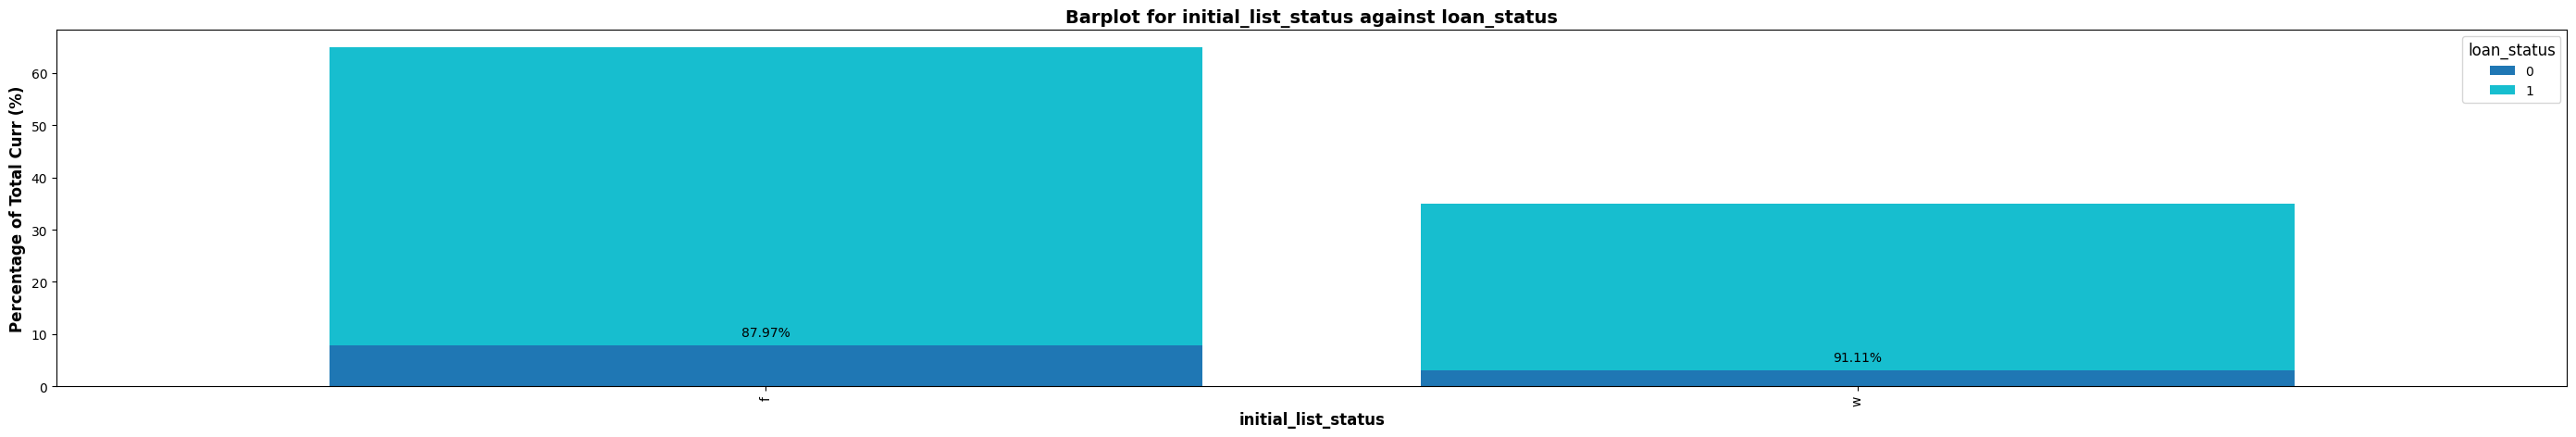

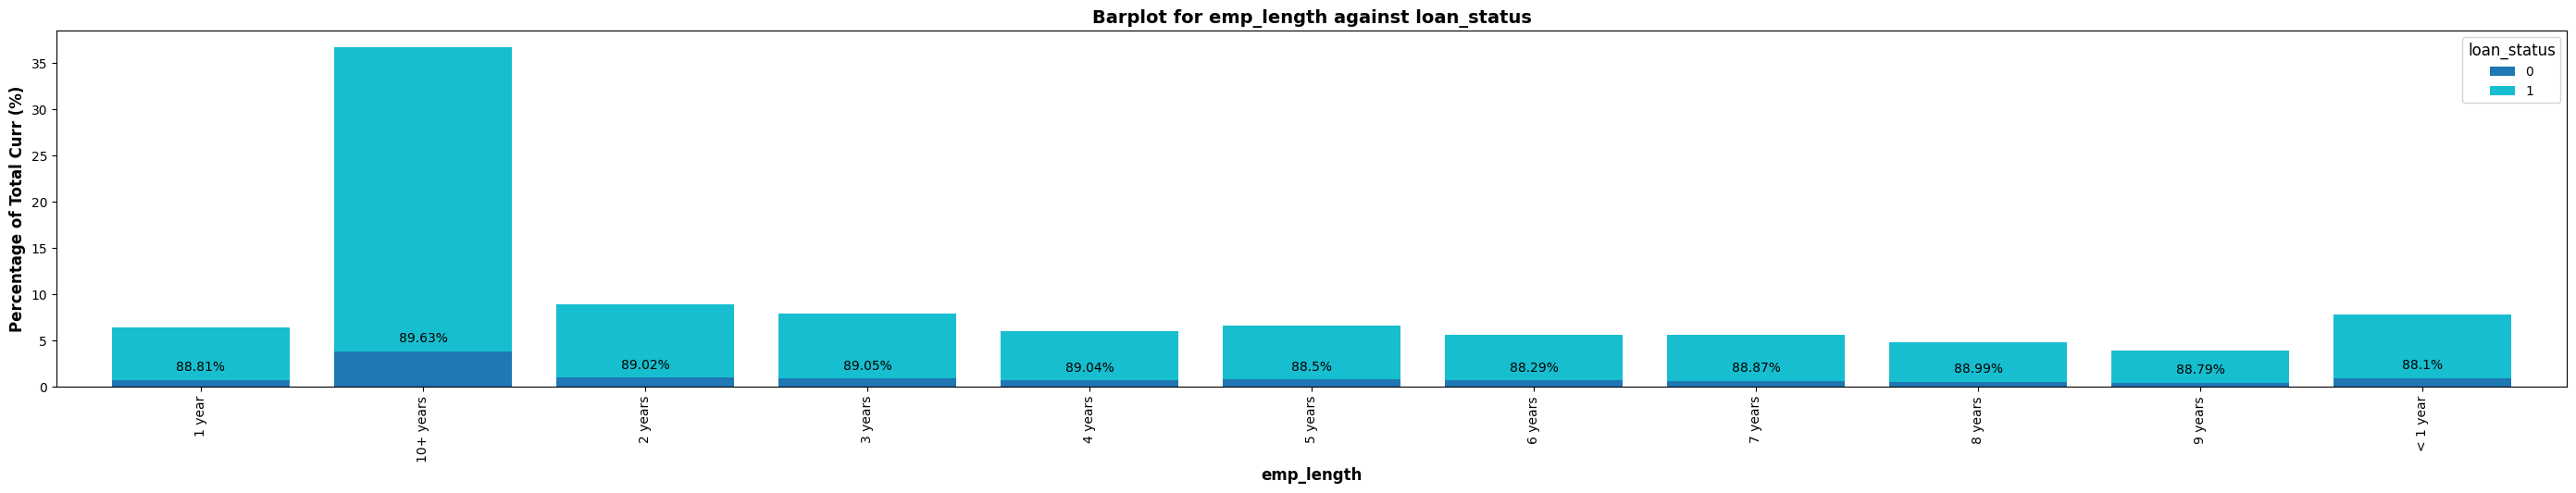

In [109]:
for col in cats:
    if col != 'loan_status':
        dfg = df_final.groupby([col, 'loan_status'])['id'].nunique().reset_index()

        dfg_a = df_final.groupby([col, 'loan_status'])['id'].nunique().reset_index()
        dfg = df_final.groupby(col)['id'].nunique().reset_index()

        dfg['total_df'] = [466285 for y in range(df_final[col].nunique())]

        dfg.rename(columns={'id': 'total_fitur'}, inplace=True)
        dfg_a.rename(columns={'id': 'subtotal'}, inplace=True)
        dfg_merge = dfg_a.merge(dfg, how='left')
        dfg_merge['ratio'] = round(dfg_merge['subtotal'] / dfg_merge['total_df'] * 100, 2)
        dfg_merge['sub_ratio'] = round(dfg_merge['subtotal'] / dfg_merge['total_fitur'] * 100, 2)

        dfg_merge1 = dfg_merge.pivot_table(index=col, columns='loan_status', values='sub_ratio')
        dfg_merge2 = dfg_merge.pivot_table(index=col, columns='loan_status', values='ratio')

        # Mengatur ukuran gambar dengan plt.rcParams
        plt.rcParams['figure.figsize'] = (35, 5)  # Sesuaikan ukuran lebar dan tinggi gambar di sini
        bar = dfg_merge2.plot(kind='bar', stacked=True, colormap='tab10', width=0.8)  # Sesuaikan nilai width sesuai kebutuhan
        for i in bar.containers[:int(len(bar.containers) / 2)]:
            bar.bar_label(i, padding=5, fmt="{:0,.2f}%", label_type='edge', labels=[f'{x}%' for x in dfg_merge1[1].values])
        plt.ylabel('Percentage of Total Curr (%)', fontsize=12, fontweight='bold')
        plt.xlabel(col, fontsize=12, fontweight='bold')
        plt.title(f'Barplot for {col} against loan_status', fontsize=14, fontweight='bold')
        plt.legend(title='loan_status', title_fontsize='12', labels=['0', '1'])
        plt.show()


### Interpretasi

- Pinjaman dengan jangka waktu yang lebih pendek (36 bulan) memiliki tingkat keberhasilan bayar sekitar 90.29%, sedangkan pinjaman dengan jangka waktu lebih panjang (60 bulan) memiliki tingkat keberhasilan bayar sekitar 85.85%. Dengan demikian, perbandingan ini menunjukkan bahwa pinjaman dengan jangka waktu 36 bulan memiliki tingkat keberhasilan bayar yang lebih tinggi sekitar 4.44% dibandingkan dengan pinjaman 60 bulan.

- Grade mungkin mencerminkan peringkat keberhasilan bayar yang ditetapkan oleh lembaga pemberi pinjaman. Semakin tinggi grade, semakin tinggi keberhasilan bayar. Sebagai contoh, Grade A memiliki tingkat keberhasilan bayar tertinggi sebesar 96.13%, diikuti oleh Grade B, C, D, E, F, dan G. Grade G memiliki tingkat keberhasilan bayar terendah, yaitu sebesar 72.19%. Dengan demikian, terdapat kecenderungan bahwa semakin tinggi grade, semakin tinggi juga tingkat keberhasilan bayar.

- Peminjam yang memiliki rumah dengan status "MORTGAGE" atau rumah sendiri memiliki tingkat keberhasilan bayar yang tinggi, mencapai 90.4%. Di sisi lain, peminjam yang memiliki status "OTHER" memiliki tingkat keberhasilan bayar yang lebih rendah, yaitu sebesar 79.12%.

- Dalam konteks verifikasi status, peminjam dengan status "Not Verified" memiliki tingkat keberhasilan bayar sebesar 90.59%. Sementara itu, peminjam dengan status "Source Verified" memiliki tingkat keberhasilan bayar sebesar 89.59%, dan peminjam dengan status "Verified" memiliki tingkat keberhasilan bayar sebesar 87.26%. Sebagai tambahan, tingkat keberhasilan bayar menurun dari "Not Verified" ke "Source Verified" dan kemudian ke "Verified".
- Tingkat keberhasilan pembayaran pinjaman pada berbagai tingkat pengalaman kerja (employment length) menunjukkan kestabilan yang konsisten, dengan rata-rata sekitar 80%, menandakan bahwa lama pengalaman kerja tidak menjadi faktor dominan dalam mempengaruhi kemampuan peminjam untuk membayar pinjaman.

### Univariate Analysis Numeric Feature

In [110]:
# Variabel Numerik (nums)
nums = [
    'Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
    'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
    'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
    'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
    'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
    'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'
]


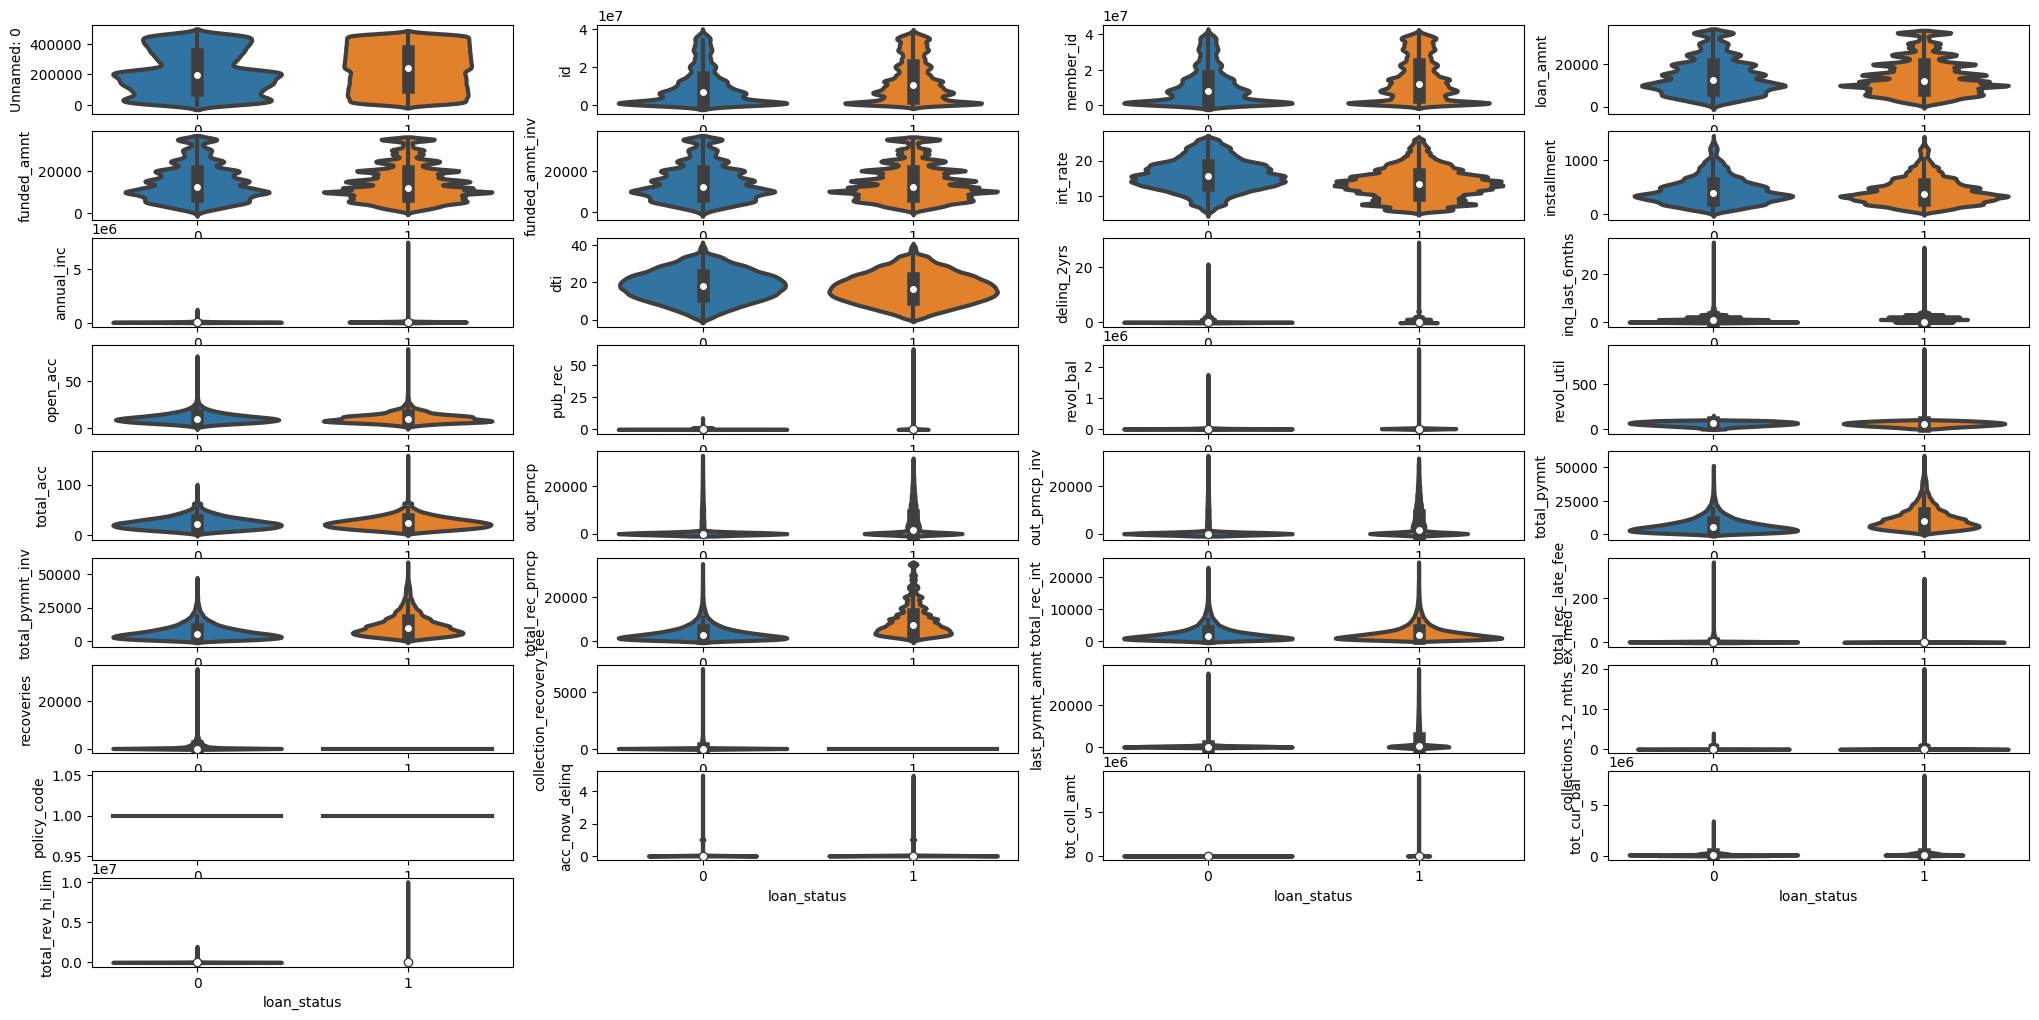

In [111]:
import math

plt.figure(figsize=(25, 15))
for i in range (0, len(nums)):
  plt.subplot(math.ceil(len(nums)/3), 4, i+1)
  sns.violinplot(data=df_final, y=nums[i], x='loan_status', linewidth=3, orient='v')
plt.savefig('uninum.png')

Sebagian besar fitur memiliki outlier
Fitur tanpa outlier: loan_amnt,funded_amnt,funded_amnt_inv,int_rate

outlier yang parah:

installment

annual_inc

open_acc

revol_bal

total_pymnt_inv

out_prncp

total_rec_late_fee

out_prncp_inv

total_rec_prncp

total_pymnt

total_acc

total_rec_int

last_pymnt_amnt

total_rev_hi_lim

recoveries

total_coll_amt

pymnt_time

collection_recovery_fee

tot_cur_bal

credit_pull_year

### **5. Feature Selection**



Drop Kolom Yang Mempunyai 1 Nilau Unique, atau memiliki banyak nilai unique

In [112]:
#categorical feature
colum_drop1 = ['sub_grade', 'emp_title', 'issue_d', 'url', 'purpose', 'title', 'zip_code', 'addr_state',
    'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d','application_type','emp_length']

In [113]:
df_final.drop(columns=colum_drop1, inplace=True)

In [114]:
# numerical feature
colum_drop2 = ['Unnamed: 0','id','member_id','policy_code']

In [115]:
df_final.drop(columns=colum_drop2, inplace=True)

In [116]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 36 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   funded_amnt                 466285 non-null  int64  
 2   funded_amnt_inv             466285 non-null  float64
 3   term                        466285 non-null  object 
 4   int_rate                    466285 non-null  float64
 5   installment                 466285 non-null  float64
 6   grade                       466285 non-null  object 
 7   home_ownership              466285 non-null  object 
 8   annual_inc                  466285 non-null  float64
 9   verification_status         466285 non-null  object 
 10  loan_status                 466285 non-null  int64  
 11  pymnt_plan                  466285 non-null  object 
 12  dti                         466285 non-null  float64
 13  delinq_2yrs   

In [117]:
nums1=['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
    'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
    'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
    'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
    'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med',
    'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'
]

In [118]:
X_numerical = df_final[nums1]
y_target = df_final['loan_status']

# Hitung korelasi Pearson
correlation_matrix = X_numerical.corrwith(y_target)

# Buat DataFrame untuk menyimpan hasil korelasi
correlation_df = pd.DataFrame({'Feature': correlation_matrix.index, 'Correlation with Target': correlation_matrix.values})

In [119]:
# Mengurutkan DataFrame berdasarkan nilai korelasi
correlation_df_sorted = correlation_df.sort_values(by='Correlation with Target', ascending=False)
correlation_df_sorted

,Feature,Correlation with Target
18,total_rec_prncp,0.253875
17,total_pymnt_inv,0.195169
16,total_pymnt,0.194438
23,last_pymnt_amnt,0.168030
14,out_prncp,0.158676
15,out_prncp_inv,0.158662
27,tot_cur_bal,0.054105
5,annual_inc,0.049863
28,total_rev_hi_lim,0.037890
19,total_rec_int,0.026726


Drop kolom dengan korelasi kurang dari 0.01

pub_rec

open_acc

collections_12_mths_ex_med

tot_coll_amt

acc_now_delinq

delinq_2yrs

funded_amnt_inv



In [120]:
colum_drop3 = [
    'pub_rec', 'open_acc', 'collections_12_mths_ex_med',
    'tot_coll_amt', 'acc_now_delinq', 'delinq_2yrs', 'funded_amnt_inv'
]

In [121]:
df_final.drop(columns=colum_drop3, inplace=True)

In [122]:
df_final.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,dti,inq_last_6mths,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,36 months,10.65,162.87,B,RENT,24000.0,Verified,1,n,27.65,1.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,81539.0,22800.0
1,2500,2500,60 months,15.27,59.83,C,RENT,30000.0,Source Verified,0,n,1.00,5.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,81539.0,22800.0
2,2400,2400,36 months,15.96,84.33,C,RENT,12252.0,Not Verified,1,n,8.72,2.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,81539.0,22800.0
3,10000,10000,36 months,13.49,339.31,C,RENT,49200.0,Source Verified,1,n,20.00,1.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,81539.0,22800.0
4,3000,3000,60 months,12.69,67.79,B,RENT,80000.0,Source Verified,1,n,17.94,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,81539.0,22800.0


In [123]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   loan_amnt                466285 non-null  int64  
 1   funded_amnt              466285 non-null  int64  
 2   term                     466285 non-null  object 
 3   int_rate                 466285 non-null  float64
 4   installment              466285 non-null  float64
 5   grade                    466285 non-null  object 
 6   home_ownership           466285 non-null  object 
 7   annual_inc               466285 non-null  float64
 8   verification_status      466285 non-null  object 
 9   loan_status              466285 non-null  int64  
 10  pymnt_plan               466285 non-null  object 
 11  dti                      466285 non-null  float64
 12  inq_last_6mths           466285 non-null  float64
 13  revol_bal                466285 non-null  int64  
 14  revo

In [126]:
df_final.to_csv('df_final_1.csv', index=False)
!cp 'df_final_1.csv' '/content/drive/MyDrive/RAKAMIN ACADEMY BATCH 33/PBI- IDX PARTNERS'
print('Saving cleaned data is done!')

Saving cleaned data is done!


### **6. Feature Scalling dan Encoding**



In [138]:
df_final_1 = pd.read_csv('/content/drive/MyDrive/RAKAMIN ACADEMY BATCH 33/PBI- IDX PARTNERS/df_final_1.csv')
df_final_1.sample(5)

,loan_amnt,funded_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,dti,inq_last_6mths,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,tot_cur_bal,total_rev_hi_lim
17917,8000,8000,60 months,14.91,189.95,D,MORTGAGE,65000.0,Not Verified,1,n,10.91,0.0,16539,84.0,17.0,f,568.29,568.29,10805.05000,10805.05,7431.72,3373.33,0.0,0.0,0.0,189.95,81539.0,22800.0
256753,15000,15000,60 months,11.44,329.44,B,RENT,92000.0,Source Verified,1,n,15.74,0.0,1428,22.3,32.0,w,12221.76,12221.76,4593.09000,4593.09,2778.24,1814.85,0.0,0.0,0.0,329.44,110885.0,6400.0
210542,12500,12500,36 months,14.09,427.77,B,OWN,25000.0,Not Verified,1,n,21.50,0.0,11967,90.7,15.0,f,0.00,0.00,15134.61938,15134.62,12500.00,2634.62,0.0,0.0,0.0,4444.93,81539.0,22800.0
424518,20000,20000,60 months,16.59,492.66,D,RENT,54000.0,Verified,1,n,20.33,0.0,15624,55.2,13.0,w,14774.54,14774.54,10345.86000,10345.86,5225.46,5120.40,0.0,0.0,0.0,492.66,23662.0,28300.0
396317,9250,9250,36 months,12.49,309.41,B,OWN,27000.0,Source Verified,1,n,29.82,0.0,3042,31.4,19.0,w,4542.61,4542.61,6188.20000,6188.20,4707.39,1480.81,0.0,0.0,0.0,309.41,12456.0,9700.0


In [139]:
# Mengganti nilai n=0, y=1, di feature pymnt_plan
df_final_1['pymnt_plan'] = df_final_1['pymnt_plan'].replace({'n':0,'y':1})

In [140]:
#Label encoding

cat_1=['grade']
cat_cols = []
for col in cat_1:
    map_dict = {k:i for i, k in enumerate(df_final_1[col].value_counts().index,0)}
    df_final_1[col] = df_final_1[col].map(map_dict)

In [141]:
df_final_1.head(3)

,loan_amnt,funded_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,dti,inq_last_6mths,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,36 months,10.65,162.87,0,RENT,24000.0,Verified,1,0,27.65,1.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,171.62,81539.0,22800.0
1,2500,2500,60 months,15.27,59.83,1,RENT,30000.0,Source Verified,0,0,1.00,5.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,119.66,81539.0,22800.0
2,2400,2400,36 months,15.96,84.33,1,RENT,12252.0,Not Verified,1,0,8.72,2.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,649.91,81539.0,22800.0


In [142]:
# One-hot encoding for specified categorical columns
cat_encod=['term','home_ownership','verification_status','initial_list_status']
for cat in cat_encod:
    nominal_encoded = pd.get_dummies(df_final_1[cat], prefix=cat)
    df_final_1 = pd.concat([df_final_1, nominal_encoded], axis=1)

# Drop the original categorical columns
df_final_1.drop(cat_encod, axis=1, inplace=True)

# Drop columns with object dtype (assuming you want to drop all remaining categorical columns)
for column in df_final_1.columns:
    if df_final_1[column].dtype == object and column != 'loan_status':
        df_final_1.drop(column, axis=1, inplace=True)

In [143]:
df_final_1.head(3)

,loan_amnt,funded_amnt,int_rate,installment,grade,annual_inc,loan_status,pymnt_plan,dti,inq_last_6mths,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,tot_cur_bal,total_rev_hi_lim,term_36 months,term_60 months,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status_f,initial_list_status_w
0,5000,5000,10.65,162.87,0,24000.0,1,0,27.65,1.0,13648,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,171.62,81539.0,22800.0,1,0,0,0,0,0,0,1,0,0,1,1,0
1,2500,2500,15.27,59.83,1,30000.0,0,0,1.00,5.0,1687,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,119.66,81539.0,22800.0,0,1,0,0,0,0,0,1,0,1,0,1,0
2,2400,2400,15.96,84.33,1,12252.0,1,0,8.72,2.0,2956,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,649.91,81539.0,22800.0,1,0,0,0,0,0,0,1,1,0,0,1,0


In [144]:
df_final_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 38 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            466285 non-null  int64  
 1   funded_amnt                          466285 non-null  int64  
 2   int_rate                             466285 non-null  float64
 3   installment                          466285 non-null  float64
 4   grade                                466285 non-null  int64  
 5   annual_inc                           466285 non-null  float64
 6   loan_status                          466285 non-null  int64  
 7   pymnt_plan                           466285 non-null  int64  
 8   dti                                  466285 non-null  float64
 9   inq_last_6mths                       466285 non-null  float64
 10  revol_bal                            466285 non-null  int64  
 11  revol_util   

In [148]:
df_final_1.to_csv('df_mod.csv', index=False)
!cp 'df_mod.csv' '/content/drive/MyDrive/RAKAMIN ACADEMY BATCH 33/PBI- IDX PARTNERS'
print('Saving cleaned data is done!')

Saving cleaned data is done!


### **7. Modeling**



### Split Train and Test


In [149]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [150]:
df_mod = pd.read_csv('/content/drive/MyDrive/RAKAMIN ACADEMY BATCH 33/PBI- IDX PARTNERS/df_mod.csv')
df_mod.sample(5)

,loan_amnt,funded_amnt,int_rate,installment,grade,annual_inc,loan_status,pymnt_plan,dti,inq_last_6mths,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,tot_cur_bal,total_rev_hi_lim,term_36 months,term_60 months,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status_f,initial_list_status_w
56942,8275,8275,15.10,287.27,1,31500.0,0,0,33.56,0.0,17335,48.0,8.0,0.00,0.00,3774.09,3774.09,1938.61,933.97,0.0,901.51,9.0151,287.27,32038.0,36100.0,1,0,0,0,0,0,0,1,0,1,0,1,0
151303,15000,15000,6.03,456.54,3,103000.0,1,0,14.40,0.0,15798,20.1,35.0,1356.98,1356.98,15074.09,15074.09,13643.02,1431.07,0.0,0.00,0.0000,456.54,299818.0,78500.0,1,0,0,1,0,0,0,0,1,0,0,1,0
271962,15000,15000,17.57,377.41,2,100000.0,1,0,14.53,0.0,10571,60.8,28.0,12567.96,12567.96,5282.09,5282.09,2432.04,2850.05,0.0,0.00,0.0000,377.41,266645.0,17400.0,0,1,0,1,0,0,0,0,1,0,0,0,1
130984,20000,20000,7.62,623.23,3,61248.0,1,0,16.75,1.0,7200,14.4,30.0,0.00,0.00,20602.87,20602.87,20000.00,602.87,0.0,0.00,0.0000,18118.11,119122.0,49995.0,1,0,0,1,0,0,0,0,0,1,0,1,0
161662,9000,9000,10.16,291.09,0,45915.0,1,0,14.30,0.0,16999,60.7,12.0,0.00,0.00,9078.03,9078.03,9000.00,78.03,0.0,0.00,0.0000,134.52,16999.0,28000.0,1,0,0,0,0,0,0,1,1,0,0,1,0


### Split Train and Test

In [151]:
X = df_mod.drop(['loan_status'],axis=1,inplace=False)
y = df_mod['loan_status']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state=422, stratify = y)

### Handling Outlier and Imbalance Data

In [162]:
num_clean = [
    'installment',
    'annual_inc',
    'revol_bal',
    'total_pymnt_inv',
    'out_prncp',
    'total_rec_late_fee',
    'out_prncp_inv',
    'total_rec_prncp',
    'total_pymnt',
    'total_acc',
    'total_rec_int',
    'last_pymnt_amnt',
    'total_rev_hi_lim',
    'recoveries',
    'collection_recovery_fee',
    'tot_cur_bal',
]

In [163]:
for var in num_clean:
  Xtrain[var]= (Xtrain[var]).apply(np.log1p)
  Xtest[var]= (Xtest[var]).apply(np.log1p)

In [164]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

for col in num_clean:
  scaler = ss.fit(Xtrain[[col]])

  Xtrain[[col]] = ss.transform(Xtrain[[col]])
  Xtest[[col]] = ss.transform(Xtest[[col]])

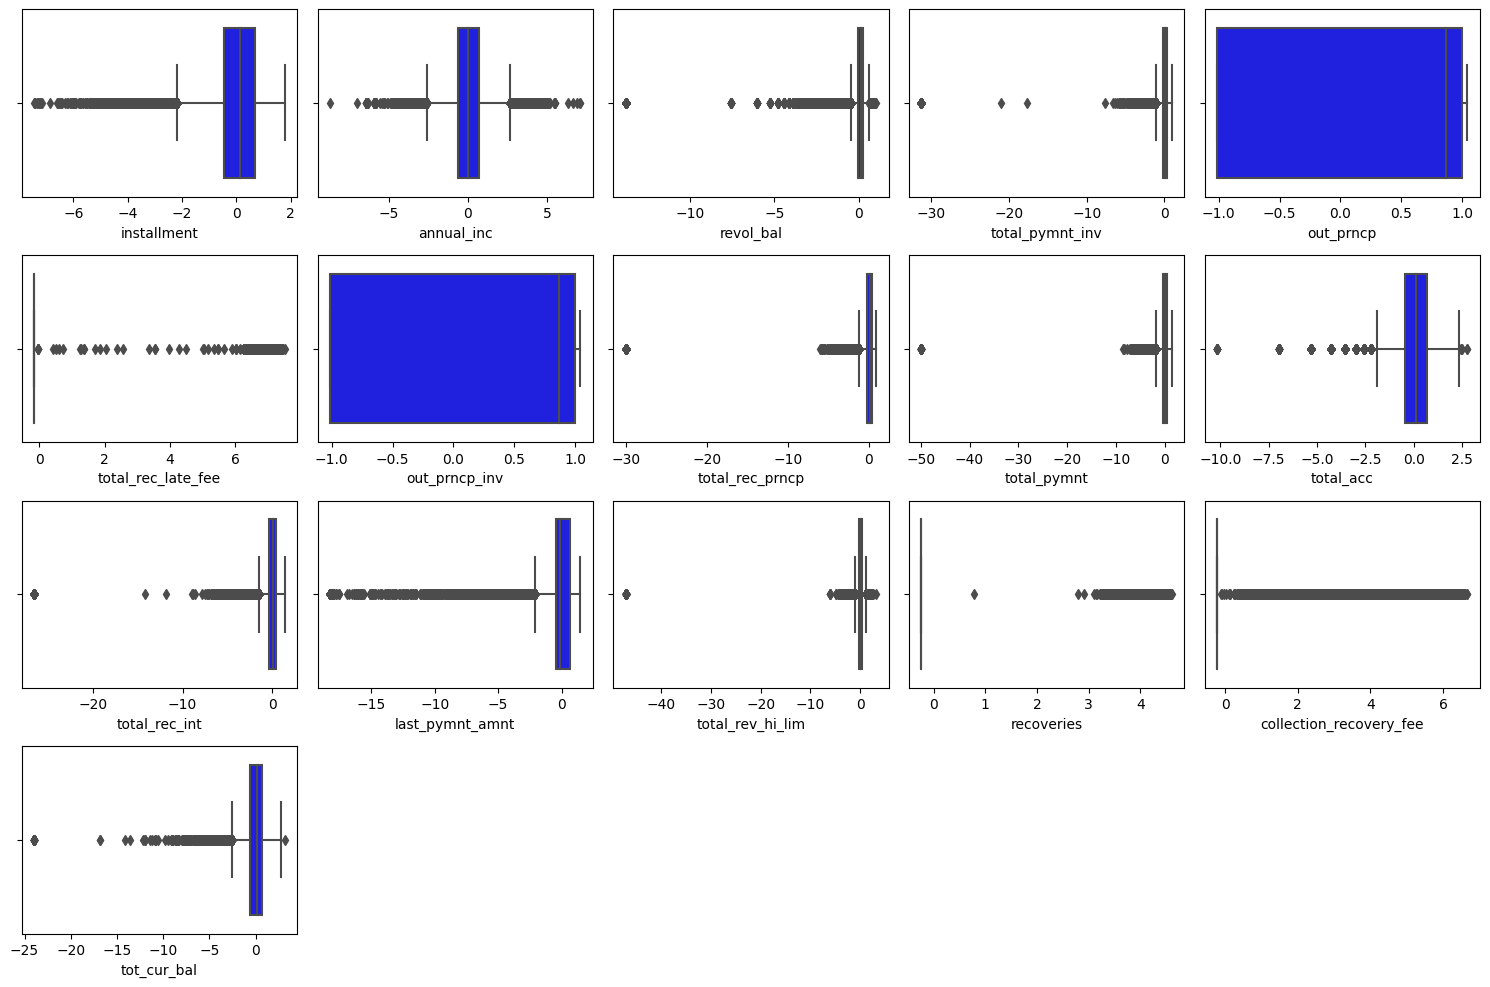

In [165]:
plt.figure(figsize=(15, 12))
#Individual Displot
for i in range (0, len(num_clean)):
  plt.subplot(5,5,i+1)
  sns.boxplot(x=Xtrain[num_clean[i]],color='blue')
  plt.xlabel(num_clean[i])
  plt.tight_layout()

In [167]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326399 entries, 426089 to 115437
Data columns (total 37 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            326399 non-null  int64  
 1   funded_amnt                          326399 non-null  int64  
 2   int_rate                             326399 non-null  float64
 3   installment                          326399 non-null  float64
 4   grade                                326399 non-null  int64  
 5   annual_inc                           326399 non-null  float64
 6   pymnt_plan                           326399 non-null  int64  
 7   dti                                  326399 non-null  float64
 8   inq_last_6mths                       326399 non-null  float64
 9   revol_bal                            326399 non-null  float64
 10  revol_util                           326399 non-null  float64
 11  total_ac

In [168]:
Xtrain.head()

,loan_amnt,funded_amnt,int_rate,installment,grade,annual_inc,pymnt_plan,dti,inq_last_6mths,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,tot_cur_bal,total_rev_hi_lim,term_36 months,term_60 months,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status_f,initial_list_status_w
426089,6000,6000,18.25,-1.335518,2,1.735023,0,16.67,1.0,-0.205047,98.0,0.705501,0.977393,0.977410,-0.899133,-0.538732,-0.829747,0.069885,-0.152943,-0.235278,-0.219689,-0.890711,1.565513,-1.459177,0,1,0,1,0,0,0,0,0,1,0,0,1
137307,10400,10400,12.12,0.002353,0,0.138917,0,23.80,1.0,0.294518,65.2,-0.225449,0.926313,0.926330,0.234231,0.172507,0.239490,0.174544,-0.152943,-0.235278,-0.219689,-0.363148,-0.478346,0.487283,1,0,0,0,0,0,0,1,0,1,0,0,1
314654,10000,10000,9.17,-0.120192,0,-1.024344,0,15.95,0.0,0.008015,30.7,0.052776,0.987729,0.987375,-0.451561,-0.263773,-0.196871,-0.277651,-0.152943,-0.235278,-0.219689,-0.411925,-1.328254,0.127819,1,0,0,0,0,0,1,0,0,0,1,1,0
349068,10000,10000,10.15,-0.098651,0,0.221953,0,1.97,0.0,-0.183619,12.0,-0.126533,-1.013058,-1.013057,0.238900,0.175437,0.291128,-0.190731,-0.152943,-0.235278,-0.219689,0.949467,-2.649051,0.268174,1,0,0,0,0,0,0,1,1,0,0,1,0
326864,11200,11200,20.20,-0.222929,4,-0.508685,0,10.30,3.0,-0.137589,77.2,0.419365,1.003185,1.003203,-0.458011,-0.261907,-0.601705,0.391568,-0.152943,-0.235278,-0.219689,-0.452747,-0.834852,-1.025487,0,1,0,0,0,0,0,1,0,1,0,0,1


### Handling Imbalance Data

In [169]:
ytrain.value_counts()

1    290721
0     35678
Name: loan_status, dtype: int64

In [170]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=1, random_state=4022)
Xtrain_over, ytrain_over = smote.fit_resample(Xtrain, ytrain)

print('SMOTE')
print(pd.Series(ytrain_over).value_counts())

SMOTE
1    290721
0    290721
Name: loan_status, dtype: int64


In [171]:
df.duplicated().sum()

0

### Modeling

In [172]:
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
import time
def eval_classification(model, smote=True):
    y_pred = model.predict(Xtest)
    y_pred_train = model.predict(Xtrain)
    y_pred_proba = model.predict_proba(Xtest)
    y_pred_proba_train = model.predict_proba(Xtrain)


    model1 = Pipeline([
        ('sampling', SMOTE(sampling_strategy=1, random_state=4022)),
        ('classification', model)
    ])

    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(ytrain, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(ytest, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(ytrain, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, y_pred))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(ytest, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(ytrain, y_pred_proba_train[:, 1]))

    if smote==True:
      cv = RepeatedStratifiedKFold(random_state=42, n_repeats = 3)
      score = cross_validate(model1, X=Xtrain, y=ytrain, cv=cv, scoring='roc_auc', return_train_score=True)
      print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
      print('roc_auc (crossval test): '+ str(score['test_score'].mean()))


def grid_pipe(pipedict, hyperdict, scoring='recall', display=True):
    fitted_models={}
    for name, pipeline in pipedict.items():
    # Construct grid search
        model = GridSearchCV(estimator=pipeline,
                             param_grid=hyperdict[name],
                             scoring=scoring,
                             cv=5, verbose=2, n_jobs=-1, return_train_score = True)

        # Fit using grid search
        start = time.time()
        model.fit(Xtrain, ytrain)
        end = time.time()

        #Append model
        fitted_models[name]=model
        if display:
            #Print when the model has been fitted
            print(f'The {name} model has been fitted.')
            # print fit time
            print('Total Fit Time: %.3fs' % (end-start))
            # Best params
            print('Best params:\n', model.best_params_,'\n')

    return fitted_models

def confusion(model):
    y_pred_proba = model.predict_proba(Xtest)
    y_predict = model.predict(Xtest)
    print('Accuracy: %.2f%%' % (accuracy_score(ytest, y_predict) * 100 ))
    print('Precision: %.2f%%' % (precision_score(ytest, y_predict) * 100))
    print('Recall: %.2f%%' % (recall_score(ytest, y_predict) * 100))
    print('F1_Score: %.2f%%' % (f1_score(ytest, y_predict) * 100))
    print('ROC_AUC: %.2f%%' % (roc_auc_score(ytest, y_pred_proba[:,1]) * 100))
    confusion_matrix_model = confusion_matrix(ytest, y_predict)
    plt.figure(figsize=(12,8))
    ax = plt.subplot()
    sns.heatmap(confusion_matrix_model, annot=True, fmt='g', ax = ax)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')
    ax.set_title(f'Confusion Matrix - {model}')
    ax.xaxis.set_ticklabels(['0','1'])
    ax.yaxis.set_ticklabels(['0','1'])

### **Logistic Regression**

In [173]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(Xtrain_over, ytrain_over)

eval_classification(logreg)

Accuracy (Test Set): 0.88
Accuracy (Train Set): 0.88
Precision (Test Set): 0.97
Recall (Test Set): 0.89
Recall (Train Set): 0.90
F1-Score (Test Set): 0.93
roc_auc (test-proba): 0.89
roc_auc (train-proba): 0.89
roc_auc (crossval train): 0.8688705178447372
roc_auc (crossval test): 0.8686525782027374


### **Ada Boost**

In [174]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(Xtrain_over, ytrain_over)
eval_classification(ada)

Accuracy (Test Set): 0.97
Accuracy (Train Set): 0.97
Precision (Test Set): 0.98
Recall (Test Set): 0.99
Recall (Train Set): 0.99
F1-Score (Test Set): 0.99
roc_auc (test-proba): 0.96
roc_auc (train-proba): 0.96
roc_auc (crossval train): 0.9631451784931669
roc_auc (crossval test): 0.9622443906504451


### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 402)
rf.fit(Xtrain_over, ytrain_over)

eval_classification(rf)

Accuracy (Test Set): 0.98
Accuracy (Train Set): 1.00
Precision (Test Set): 0.98
Recall (Test Set): 1.00
Recall (Train Set): 1.00
F1-Score (Test Set): 0.99
roc_auc (test-proba): 0.97
roc_auc (train-proba): 1.00


### **XGBoost**

In [ ]:
from xgboost import XGBClassifier
xg = XGBClassifier(nthread=6, tree_method='hist', predictor='cpu_predictor')

xg.fit(Xtrain_over, ytrain_over)

eval_classification(xg)